<a href="https://colab.research.google.com/github/ua-datalab/DataEngineering/blob/main/06_Workshop_Mar_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cassandra Basics

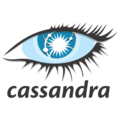

## Apache Cassandra is an open source non-relational (or NoSQL) database that enables continuous availability, tremendous scale, and data distribution across multiple data centers and cloud availability zones. It is the database of choice for scalable, highly available, globally-distributed, always-on applications.

In [ ]:
# !pip install faker

In [ ]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

In [ ]:
# If your Cassandra cluster requires authentication:
cluster = Cluster(['127.0.0.1'])

# Establish a session
session = cluster.connect()

# If you're connecting to a specific keyspace:
# session = cluster.connect('your_keyspace')

## In cassandra, keyspaces = database;

In [ ]:
# Retrieve and print the list of keyspaces
# keyspaces = session.execute("SELECT keyspace_name FROM system_schema.keyspaces;")
# for keyspace in keyspaces:
#     print(keyspace.keyspace_name)
keyspaces = session.execute("DESCRIBE keyspaces;")
for keyspace in keyspaces:
    print(keyspace.keyspace_name)

system
system_auth
system_distributed
system_schema
system_traces
system_views
system_virtual_schema


In [ ]:
from faker import Faker
# Initialize Faker
fake = Faker()

### these are default keyspaces; so we would make one for us

## Create a Keyspace
### Create a keyspace for our user data. For simplicity and demonstration, we'll use SimpleStrategy with a replication factor of 1. In a production environment, consider using NetworkTopologyStrategy.

In [ ]:
# Create a keyspace
session.execute("""
CREATE KEYSPACE IF NOT EXISTS user_data
WITH replication = {'class': 'SimpleStrategy', 'replication_factor': '1'}
""")
session.set_keyspace('user_data')

## Create Tables
## Define three tables within our keyspace to hold user profiles, activities, and preferences.

In [ ]:
# Table for user profiles
session.execute("""
CREATE TABLE IF NOT EXISTS user_profiles (
    user_id UUID PRIMARY KEY,
    name TEXT,
    email TEXT,
    age INT
)
""")

In [ ]:
# Table for user activities
session.execute("""
CREATE TABLE IF NOT EXISTS user_activities (
    activity_id UUID PRIMARY KEY,
    user_id UUID,
    activity_type TEXT,
    timestamp TIMESTAMP,
    details TEXT
)
""")

In [ ]:
# Table for user preferences
session.execute("""
CREATE TABLE IF NOT EXISTS preference_data (
    user_id UUID PRIMARY KEY,
    preferences MAP<TEXT, TEXT>
)
""")

### check for keyspace and tables

In [ ]:
keyspaces = session.execute("DESCRIBE keyspaces;")
for keyspace in keyspaces:
    print(keyspace.keyspace_name)

system
system_auth
system_distributed
system_schema
system_traces
system_views
system_virtual_schema
user_data


## we can verify our user_data keyspace and the tables present;

In [ ]:

tables = session.execute("DESCRIBE KEYSPACE user_data;")
for table in tables[1:]:
    print(table.name)

preference_data
user_activities
user_profiles


## query examples

In [ ]:
# Example: Querying user_profiles
rows = session.execute("SELECT * FROM user_profiles LIMIT 10")
for row in rows:
    print(row)


### empty because we havn't added any data yet

## Insert Sample Data
### Now, let's populate these tables with sample data using Faker

### Insert Data into user_profiles

In [ ]:
import uuid

In [ ]:
for _ in range(1000):
    session.execute(
        """
        INSERT INTO user_profiles (user_id, name, email, age) VALUES (%s, %s, %s, %s)
        """,
        (uuid.uuid4(), fake.name(), fake.email(), fake.random_int(min=18, max=80))
    )


## lets query

In [ ]:
# Example: Querying user_profiles
rows = session.execute("SELECT * FROM user_profiles LIMIT 20")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), age=50, email='baileyapril@example.com', name='Scott Franco')
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), age=67, email='jonathandavis@example.net', name='Mr. Eric Lewis Jr.')
Row(user_id=UUID('d830f41f-1b02-4f5d-b163-7784fa1ffb24'), age=41, email='donnaochoa@example.com', name='Billy Evans')
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), age=21, email='mendezcassandra@example.org', name='Jonathan Cervantes')
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), age=42, email='theresacooper@example.org', name='Angela Wright')
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), age=44, email='alexisturner@example.net', name='Kelly Baker')
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), age=49, email='smithbrittany@example.com', name='Gail Griffin')
Row(user_id=UUID('7c3c1e81-044c-47f3-a232-14caf878faba'), age=62, email='smithnicholas@example.com', name='Debbie Hughes')
Row(user_id=UUID

### Insert Data into user_activities

## We'll simulate 10,000 activities, possibly with multiple entries per user.

In [ ]:
user_ids = [row.user_id for row in session.execute("SELECT user_id FROM user_profiles")]

for _ in range(10000):
    session.execute(
        """
        INSERT INTO user_activities (activity_id, user_id, activity_type, timestamp, details) VALUES (%s, %s, %s, %s, %s)
        """,
        (uuid.uuid4(), fake.random.choice(user_ids), fake.random.choice(['login', 'logout', 'purchase', 'browse']), fake.date_time_this_year(), fake.sentence())
    )

In [ ]:
# Example: Querying user_activities
rows = session.execute("SELECT * FROM user_activities LIMIT 10")
for row in rows:
    print(row)

Row(activity_id=UUID('673f4dba-40e2-4218-ae31-43bfe05c25ff'), activity_type='login', details='Sense understand truth positive.', timestamp=datetime.datetime(2024, 1, 4, 7, 46, 34, 847000), user_id=UUID('3f25bac6-a773-44f3-85f3-2be39d141030'))
Row(activity_id=UUID('0eeb7d45-3a33-4ea4-949f-85545ed21110'), activity_type='login', details='Left nice president tell note operation knowledge least.', timestamp=datetime.datetime(2024, 1, 24, 2, 0, 32, 862000), user_id=UUID('88c19fe2-a3a4-409d-898e-7156efc79cc6'))
Row(activity_id=UUID('853c2c63-5b0e-492e-8652-0faa0e7065b1'), activity_type='browse', details='Result three civil.', timestamp=datetime.datetime(2024, 2, 24, 3, 12, 26, 624000), user_id=UUID('a57192a5-950b-4755-8e17-f121967d8c65'))
Row(activity_id=UUID('2aafe27a-9105-4a24-8721-167a3d587f0c'), activity_type='login', details='Baby will others wall thing paper.', timestamp=datetime.datetime(2024, 2, 26, 5, 56, 33, 116000), user_id=UUID('a19f2f99-8319-400e-86cf-7c702b221ca6'))
Row(activity

### Insert Data into preference_data

In [ ]:
for user_id in user_ids:
    session.execute(
        """
        INSERT INTO preference_data (user_id, preferences) VALUES (%s, %s)
        """,
        (user_id, {'theme': fake.random.choice(['dark', 'light']), 'language': fake.random.choice(['en', 'es', 'fr', 'de'])})
    )


In [ ]:
# Example: Querying user_activities
rows = session.execute("SELECT * FROM preference_data LIMIT 10")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'dark')]))
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), preferences=OrderedMapSerializedKey([('language', 'fr'), ('theme', 'dark')]))
Row(user_id=UUID('d830f41f-1b02-4f5d-b163-7784fa1ffb24'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'light')]))
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'light')]))
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), preferences=OrderedMapSerializedKey([('language', 'es'), ('theme', 'light')]))
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), preferences=OrderedMapSerializedKey([('language', 'en'), ('theme', 'light')]))
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), preferences=OrderedMapSerializedKey([('language', 'fr'), ('theme', 'dark')]))
Row(user_id=UUID('7c3c1e81-044c-47f3-a232-14

### consider that we only have two attributes here; later we will update one entry without explicitly defining the schema

## more examples of read

## Select all profiles:

In [ ]:
# Example: Querying user_profiles
rows = session.execute("SELECT * FROM user_profiles;") ## we just print the 10 first ten

In [ ]:
print(len(list(rows)))

1000


In [ ]:
# Example: Querying user_profiles ; the ResultSet is not in memory so it will not run if we do not call the query again
rows = session.execute("SELECT * FROM user_profiles;") ## we just print the 10 first ten

In [ ]:
for row in rows[:10]: # only print first ten
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), age=50, email='baileyapril@example.com', name='Scott Franco')
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), age=67, email='jonathandavis@example.net', name='Mr. Eric Lewis Jr.')
Row(user_id=UUID('d830f41f-1b02-4f5d-b163-7784fa1ffb24'), age=41, email='donnaochoa@example.com', name='Billy Evans')
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), age=21, email='mendezcassandra@example.org', name='Jonathan Cervantes')
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), age=42, email='theresacooper@example.org', name='Angela Wright')
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), age=44, email='alexisturner@example.net', name='Kelly Baker')
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), age=49, email='smithbrittany@example.com', name='Gail Griffin')
Row(user_id=UUID('7c3c1e81-044c-47f3-a232-14caf878faba'), age=62, email='smithnicholas@example.com', name='Debbie Hughes')
Row(user_id=UUID

## Select a user's profile by ID:

In [ ]:
# Example: Querying user_profiles


rows = session.execute("SELECT * FROM user_profiles WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), age=50, email='baileyapril@example.com', name='Scott Franco')


## when there is a possibility of a lot of data being filtered, cassandra has unpredictable performance if the database is not indexed

## Select activities for a specific user: will give error

In [ ]:
# Example: Querying user_profiles
rows = session.execute("SELECT * FROM user_activities WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")
for row in rows:
    print(row)

InvalidRequest: Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"

### Cassandra restricts certain types of queries that do not directly use the primary key, particularly when you try to perform operations that scan across multiple partitions. This restriction is in place to prevent inefficient full-table scans that can degrade performance, especially in large datasets.

## alternatives
### Adjust Data Model:  model tables based on your query patterns.
### Secondary Indexes: For filtering on columns that are not part of the primary key and when data model adjustments are not feasible or enough, you might consider using secondary indexes.

In [ ]:
### create secondry index
session.execute("CREATE INDEX ON user_activities(user_id);")

## lets verify the if the index exists

In [ ]:
res = session.execute("DESCRIBE TABLE user_data.user_activities;")
for row in res:
    print(row)

In [ ]:
# Example: Querying user_profiles
rows = session.execute("SELECT * FROM user_activities WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")
for row in rows:
    print(row)

Row(activity_id=UUID('f0cc1144-5255-4be7-908e-fcda53bd33cc'), activity_type='browse', details='Off news management look official.', timestamp=datetime.datetime(2024, 2, 21, 0, 21, 48, 244000), user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'))
Row(activity_id=UUID('a117ffc5-a497-4e51-aa57-5b433cd6b472'), activity_type='browse', details='Long happy rate both carry consider on.', timestamp=datetime.datetime(2024, 2, 2, 16, 2, 25, 398000), user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'))
Row(activity_id=UUID('e50632b7-e9ae-4aa0-b039-46580011fc0f'), activity_type='browse', details='She rise development half pay teach tonight.', timestamp=datetime.datetime(2024, 2, 7, 21, 34, 55, 699000), user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'))
Row(activity_id=UUID('fcb3c11a-7132-418e-a47d-50d7798b1f9e'), activity_type='purchase', details='Degree themselves set improve.', timestamp=datetime.datetime(2024, 2, 21, 0, 20, 33, 401000), user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'))


## now it ran without any error
### another alternative is the use of ALLOW FILTERING but it has performance implications

## Select users within a specific age range: command below should provide an error

In [ ]:
# Example: Querying user_profiles
rows = session.execute("SELECT * FROM user_profiles WHERE age >= 20 AND age <= 30;")
for row in rows:
    print(row)

InvalidRequest: Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"

In [ ]:
# Example: Querying user_profiles
rows = session.execute("SELECT * FROM user_profiles WHERE age > 20 AND age < 25 ALLOW FILTERING;")
for row in rows:
    print(row)

Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), age=21, email='mendezcassandra@example.org', name='Jonathan Cervantes')
Row(user_id=UUID('81d4a39a-9dd8-4c69-bfbd-d4a07ec81bb0'), age=24, email='jason14@example.net', name='Zachary Morrison')
Row(user_id=UUID('196ceff4-25a5-4d67-87a8-a821f1f908ab'), age=22, email='wilsoncarrie@example.net', name='Ronald Tanner')
Row(user_id=UUID('81089536-bd93-4fed-a4b6-af0de8e35f6e'), age=21, email='michaelmontoya@example.net', name='Brian Bennett')
Row(user_id=UUID('bef1a6c5-ade2-4293-bc17-de55831a4ea6'), age=23, email='amy18@example.com', name='Danny Winters DDS')
Row(user_id=UUID('1fca6dca-a7a4-4a79-a871-ce9dcc7c913b'), age=23, email='james09@example.org', name='Faith Ramirez')
Row(user_id=UUID('9dfa56dd-97fc-47f1-9d7e-d06325e3b31c'), age=22, email='curtisadam@example.org', name='Mrs. Lisa Young')
Row(user_id=UUID('49e8cd80-6169-48b8-a16f-c3bd2328bbf6'), age=21, email='lfrench@example.com', name='Kelsey Bowers')
Row(user_id=UUID('12a161a8-88

## however ALLOW FILTERING; is not recommended

## Count the number of activities for a user:

In [ ]:
rows = session.execute("SELECT COUNT(*) FROM user_activities WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")
for row in rows:
    print(row)

Row(count=11)


## string matching

## Cassandra does not natively support SQL-like LIKE operations for pattern matching without full table scans, which can be highly inefficient and are not recommended for large datasets.

## so for ex: you want to know the all the users whose name starts with A, so we can not directly do it, we need to make another table and then use it

## which suggets that, the keyspace / table schema is governed by the queries, and should be considered while designing

In [ ]:
# Assuming the session is already connected to your 'user_data' keyspace

rows = session.execute("SELECT user_id, name, email FROM user_profiles")


### lets make a new table

In [ ]:
session.execute("CREATE TABLE IF NOT EXISTS user_profiles_by_initial (name_initial TEXT,user_id UUID, name TEXT, email TEXT, PRIMARY KEY (name_initial, user_id));")

## add some data to new table

In [ ]:
for row in rows:
    name_initial = row.name[0].upper()  # Extract the first letter and make it uppercase
    # Insert into the new table
    session.execute(
        """
        INSERT INTO user_profiles_by_initial (name_initial, user_id, name, email) VALUES (%s, %s, %s, %s)
        """,
        (name_initial, row.user_id, row.name, row.email)
    )


In [ ]:
rows = session.execute("SELECT * FROM user_profiles_by_initial WHERE name_initial = 'A';")
for row in rows:
    print(row)

Row(name_initial='A', user_id=UUID('0090b257-a978-4a24-af17-77c7aa836c6c'), email='john63@example.com', name='Alexander Thompson')
Row(name_initial='A', user_id=UUID('00f36699-af3a-4b1a-8440-4ab084c7f70d'), email='teresa79@example.com', name='Amanda Cobb')
Row(name_initial='A', user_id=UUID('0545c129-092e-4d0b-b1b7-9d8dcfc07b44'), email='whitneywright@example.com', name='April Powell')
Row(name_initial='A', user_id=UUID('05906baf-064b-4681-a72a-42572606337f'), email='jacksonlori@example.net', name='Andrea Gibson')
Row(name_initial='A', user_id=UUID('0d44b002-8a3a-409b-890b-06c8bd8942c4'), email='markhill@example.com', name='Albert Brown')
Row(name_initial='A', user_id=UUID('0e9f8c03-16e7-43e4-8966-40e70e3b5726'), email='ccooper@example.net', name='Andrew Stafford')
Row(name_initial='A', user_id=UUID('1014f235-38b4-4834-838c-cd5a68b765dc'), email='doughertyanthony@example.com', name='Amber Casey')
Row(name_initial='A', user_id=UUID('1060e967-dfb8-4485-be34-167484cc7abb'), email='jeffwil

## UPDATE operations

In [ ]:
rows = session.execute("SELECT * FROM user_profiles WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), age=50, email='baileyapril@example.com', name='Scott Franco')


## we would like to update the email of this person

In [ ]:
session.execute("UPDATE user_profiles SET email = 'scottfranco@example.com' WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")

In [ ]:
rows = session.execute("SELECT * FROM user_profiles WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), age=50, email='scottfranco@example.com', name='Scott Franco')


## Update user preferences:

In [ ]:
session.execute("UPDATE preference_data SET preferences = preferences + {'notifications': 'enabled'} WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")

In [ ]:
rows = session.execute("SELECT * FROM preference_data WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), preferences=OrderedMapSerializedKey([('language', 'de'), ('notifications', 'enabled'), ('theme', 'dark')]))


In [ ]:
rows = session.execute("SELECT * FROM preference_data LIMIT 10")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), preferences=OrderedMapSerializedKey([('language', 'de'), ('notifications', 'enabled'), ('theme', 'dark')]))
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), preferences=OrderedMapSerializedKey([('language', 'fr'), ('theme', 'dark')]))
Row(user_id=UUID('d830f41f-1b02-4f5d-b163-7784fa1ffb24'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'light')]))
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'light')]))
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), preferences=OrderedMapSerializedKey([('language', 'es'), ('theme', 'light')]))
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), preferences=OrderedMapSerializedKey([('language', 'en'), ('theme', 'light')]))
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), preferences=OrderedMapSerializedKey([('language', 'fr'), ('theme', 'dark')]))
Row(user_id=UU

### the above illustrates no fixed schema

## Delete operations

In [ ]:
rows = session.execute("SELECT * FROM user_profiles LIMIT 10")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), age=50, email='scottfranco@example.com', name='Scott Franco')
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), age=67, email='jonathandavis@example.net', name='Mr. Eric Lewis Jr.')
Row(user_id=UUID('d830f41f-1b02-4f5d-b163-7784fa1ffb24'), age=41, email='donnaochoa@example.com', name='Billy Evans')
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), age=21, email='mendezcassandra@example.org', name='Jonathan Cervantes')
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), age=42, email='theresacooper@example.org', name='Angela Wright')
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), age=44, email='alexisturner@example.net', name='Kelly Baker')
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), age=49, email='smithbrittany@example.com', name='Gail Griffin')
Row(user_id=UUID('7c3c1e81-044c-47f3-a232-14caf878faba'), age=62, email='smithnicholas@example.com', name='Debbie Hughes')
Row(user_id=UUID

## Delete a user profile:

In [ ]:
session.execute("DELETE FROM user_profiles WHERE user_id = d830f41f-1b02-4f5d-b163-7784fa1ffb24;")

In [ ]:
rows = session.execute("SELECT * FROM user_profiles LIMIT 10")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), age=50, email='scottfranco@example.com', name='Scott Franco')
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), age=67, email='jonathandavis@example.net', name='Mr. Eric Lewis Jr.')
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), age=21, email='mendezcassandra@example.org', name='Jonathan Cervantes')
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), age=42, email='theresacooper@example.org', name='Angela Wright')
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), age=44, email='alexisturner@example.net', name='Kelly Baker')
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), age=49, email='smithbrittany@example.com', name='Gail Griffin')
Row(user_id=UUID('7c3c1e81-044c-47f3-a232-14caf878faba'), age=62, email='smithnicholas@example.com', name='Debbie Hughes')
Row(user_id=UUID('a2d0fa38-790c-4128-87e8-771c5cd82e1f'), age=76, email='vincentfreeman@example.com', name='Zachary Robinson')
Row(use

## Delete specific preference for a user:

In [ ]:
rows = session.execute("SELECT * FROM preference_data LIMIT 10")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), preferences=OrderedMapSerializedKey([('language', 'de'), ('notifications', 'enabled'), ('theme', 'dark')]))
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), preferences=OrderedMapSerializedKey([('language', 'fr'), ('theme', 'dark')]))
Row(user_id=UUID('d830f41f-1b02-4f5d-b163-7784fa1ffb24'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'light')]))
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'light')]))
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), preferences=OrderedMapSerializedKey([('language', 'es'), ('theme', 'light')]))
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), preferences=OrderedMapSerializedKey([('language', 'en'), ('theme', 'light')]))
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), preferences=OrderedMapSerializedKey([('language', 'fr'), ('theme', 'dark')]))
Row(user_id=UU

## we would like to delete the ('notifications', 'enabled') for user_id 866ffe42-6287-4dd3-8f3a-86c2b9dc381a

In [ ]:
session.execute("UPDATE preference_data SET preferences = preferences - {'notifications'} WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")


In [ ]:
rows = session.execute("SELECT * FROM preference_data LIMIT 10")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'dark')]))
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), preferences=OrderedMapSerializedKey([('language', 'fr'), ('theme', 'dark')]))
Row(user_id=UUID('d830f41f-1b02-4f5d-b163-7784fa1ffb24'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'light')]))
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), preferences=OrderedMapSerializedKey([('language', 'de'), ('theme', 'light')]))
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), preferences=OrderedMapSerializedKey([('language', 'es'), ('theme', 'light')]))
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), preferences=OrderedMapSerializedKey([('language', 'en'), ('theme', 'light')]))
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), preferences=OrderedMapSerializedKey([('language', 'fr'), ('theme', 'dark')]))
Row(user_id=UUID('7c3c1e81-044c-47f3-a232-14

### some advanced commands

## Defining and Using User-Defined Types (UDTs)

## UDTs allow you to group related data and define your own types. This can simplify schema design and queries when dealing with complex data.

In [ ]:
session.execute("""CREATE TYPE user_address (
  street TEXT,
  city TEXT,
  zip_code INT
);""")

In [ ]:
session.execute("""ALTER TABLE user_profiles ADD address FROZEN<user_address>;""")

In [ ]:
rows = session.execute("SELECT * FROM user_profiles LIMIT 10")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), address=None, age=50, email='scottfranco@example.com', name='Scott Franco')
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), address=None, age=67, email='jonathandavis@example.net', name='Mr. Eric Lewis Jr.')
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), address=None, age=21, email='mendezcassandra@example.org', name='Jonathan Cervantes')
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), address=None, age=42, email='theresacooper@example.org', name='Angela Wright')
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), address=None, age=44, email='alexisturner@example.net', name='Kelly Baker')
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), address=None, age=49, email='smithbrittany@example.com', name='Gail Griffin')
Row(user_id=UUID('7c3c1e81-044c-47f3-a232-14caf878faba'), address=None, age=62, email='smithnicholas@example.com', name='Debbie Hughes')
Row(user_id=UUID('a2d0fa38-790c-4128

In [ ]:
session.execute("UPDATE user_profiles SET address = {street: '123 Cassandra Lane', city: 'Database City', zip_code: 12345} WHERE user_id = 866ffe42-6287-4dd3-8f3a-86c2b9dc381a;")




In [ ]:
rows = session.execute("SELECT * FROM user_profiles LIMIT 10")
for row in rows:
    print(row)

Row(user_id=UUID('866ffe42-6287-4dd3-8f3a-86c2b9dc381a'), address=user_address(street='123 Cassandra Lane', city='Database City', zip_code=12345), age=50, email='scottfranco@example.com', name='Scott Franco')
Row(user_id=UUID('c564fb6c-4999-464e-9ae6-21e28663acd0'), address=None, age=67, email='jonathandavis@example.net', name='Mr. Eric Lewis Jr.')
Row(user_id=UUID('81126ab4-842e-4d38-9a26-10c1f9237dcd'), address=None, age=21, email='mendezcassandra@example.org', name='Jonathan Cervantes')
Row(user_id=UUID('fdc0fa0b-6df8-4823-a2ea-b72235296ae0'), address=None, age=42, email='theresacooper@example.org', name='Angela Wright')
Row(user_id=UUID('082fe019-1dd7-4bea-9d6b-2e15d581e7f5'), address=None, age=44, email='alexisturner@example.net', name='Kelly Baker')
Row(user_id=UUID('1cd1ed49-3375-4e8a-bf33-46b0a4e1c73e'), address=None, age=49, email='smithbrittany@example.com', name='Gail Griffin')
Row(user_id=UUID('7c3c1e81-044c-47f3-a232-14caf878faba'), address=None, age=62, email='smithnichol

## Thank you :)